In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

data = pd.read_csv('https://raw.githubusercontent.com/MATF-istrazivanje-podataka-1/2023_Data_Mining_Chess_Dataset/main/Preprocessing/preprocessed_set(1).csv')
data.head()
data.drop(columns='Unnamed: 0',inplace=True)

In [3]:
Y = data['winner']
X = data.drop('winner', axis=1)
kolone = X.columns
X.head()

,rated,turns,victory_status,white_rating,black_rating,moves,opening_eco,opening_ply,increment_code
0,1,16,1,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,2
1,1,61,2,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,2
2,1,95,2,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,3
3,1,33,1,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,10,2
4,0,9,1,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,5,3


In [6]:
X.drop(columns=['moves'],inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [7]:
X_train.iloc[0]

rated                1
turns               16
victory_status       1
white_rating      1276
black_rating      1132
opening_eco        C00
opening_ply          5
increment_code       3
Name: 6060, dtype: object

Vec smo videli da nemamo autlajere. Svi rejtinzi su nam u normalnom okviru kao i broj poteza, a ostali podaci su nam imenski.Sada cemo svesti rejtinge i poteze na skalu [0,1] 

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

def report(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    report(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    report(y_test, y_pred)

    return model

In [9]:
# iako su otvaranja imenski atributi, moramo da ih encode-ujemo u numericke

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
X_train['opening_eco']=enc.fit_transform(X_train['opening_eco'])
X_test['opening_eco']=enc.fit_transform(X_test['opening_eco'])


knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)


Train data:

Confusion matrix: 
 [[4389 1660]
 [1521 5078]]
Accuracy score:  0.7484977862112587
Precision score:  0.7536360937963787
Recall score:  0.7695105318987725
F1 score:  0.7614905900877258

--------------------------------------

Test data:

Confusion matrix: 
 [[1193  811]
 [ 788 1425]]
Accuracy score:  0.6208204884989329
Precision score:  0.6372987477638641
Recall score:  0.6439222774514234
F1 score:  0.6405933917734322


Zelimo da vidimo kakve rezultate cemo dobiti ako normalizujemo neke kolone

In [ ]:
# def minmax(X):
#       return (X - min(X))/(max(X) - min(X))

# n='white_rating'
# m ='black_rating'
# l='turns'

# x=minmax(data.white_rating)
# X_train.drop(n,axis=1,inplace=True)
# X_train[n]=x

# x = minmax(data.black_rating)
# X_train.drop(m,axis=1,inplace=True)
# X_train[m]=x

# x=minmax(data.turns)
# X_train.drop(l, axis=1, inplace=True)
# X_train[l]=x
# X_train.head()


# x=minmax(data.white_rating)
# X_test.drop(n,axis=1,inplace=True)
# X_test[n]=x

# x = minmax(data.black_rating)
# X_test.drop(m,axis=1,inplace=True)
# X_test[m]=x

# x=minmax(data.turns)
# X_test.drop(l, axis=1, inplace=True)
# X_test[l]=x
# X_test.head()

,rated,victory_status,opening_eco,opening_ply,increment_code,white_rating,black_rating,turns
1988,1,0,4,2,2,0.647182,0.624454,0.281609
10039,0,1,37,2,2,0.406054,0.774017,0.117816
802,1,2,160,7,2,0.395094,0.491812,0.114943
15837,1,2,99,4,2,0.477557,0.454148,0.275862
3394,1,1,37,2,2,0.541754,0.421943,0.339080


In [ ]:
# enc=LabelEncoder()
# X_train['opening_eco']=enc.fit_transform(X_train['opening_eco'])
# X_test['opening_eco']=enc.fit_transform(X_test['opening_eco'])


# knn = KNeighborsClassifier()
# knn = build_model(knn, X_train, X_test, Y_train, Y_test)

Train data:

Confusion matrix: 
 [[4194 1811]
 [1667 4976]]
Accuracy score:  0.7250158127767236
Precision score:  0.7331663474289082
Recall score:  0.7490591600180642
F1 score:  0.7410275502606106

--------------------------------------

Test data:

Gde zape?

Confusion matrix: 
 [[1049  999]
 [ 971 1198]]
Accuracy score:  0.5328432534977472
Precision score:  0.5452890304961311
Recall score:  0.5523282618718304
F1 score:  0.5487860742098031


##Ovde proveri rezultat kada se cele tabele X_test i X_train normalizuju

In [ ]:
X_train= (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test= (X_test-X_test.min())/(X_test.max()-X_test.min())

knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)


Train data:

Confusion matrix: 
 [[4295 1696]
 [1559 5098]]
Accuracy score:  0.7426470588235294
Precision score:  0.7503679717397704
Recall score:  0.7658104251164188
F1 score:  0.758010556835923

--------------------------------------

Test data:

Confusion matrix: 
 [[1133  929]
 [ 777 1378]]
Accuracy score:  0.5954470002371354
Precision score:  0.5973125270914608
Recall score:  0.6394431554524362
F1 score:  0.6176602420439266


# GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}
estimator = GridSearchCV(KNeighborsClassifier(), params_grid)

In [14]:
estimator.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [15]:
estimator.best_params_

{'n_neighbors': 40, 'p': 2, 'weights': 'uniform'}

In [16]:
estimator.best_score_

0.6476126263407711

In [17]:
estimator = build_model(estimator, X_train, X_test, Y_train, Y_test)

Train data:

Confusion matrix: 
 [[4037 2012]
 [2126 4473]]
Accuracy score:  0.6728336495888678
Precision score:  0.689745566692367
Recall score:  0.677829974238521
F1 score:  0.6837358605930907

--------------------------------------

Test data:

Confusion matrix: 
 [[1297  707]
 [ 763 1450]]
Accuracy score:  0.6514109556556794
Precision score:  0.6722299490032453
Recall score:  0.6552191595119747
F1 score:  0.6636155606407323


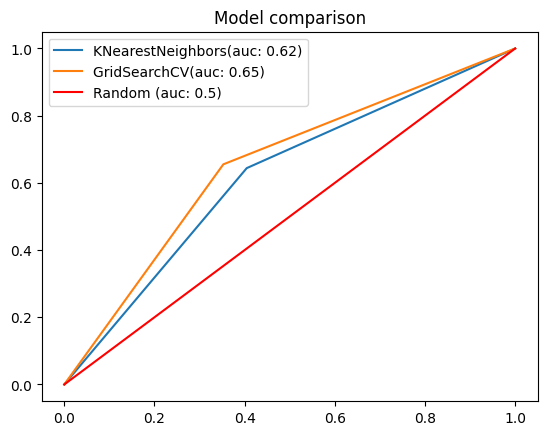

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()


In [19]:
modeli=[knn, estimator.best_estimator_]
from joblib import dump
dump(modeli, 'knn_modeli.joblib')

['knn_modeli.joblib']